In [1]:
%run read&clean.ipynb
%run Jean.ipynb

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

/Users/AymericLepine/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')
(1993, 101)
0.15363773206221795
0.25


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

list_correlation = ['fold','agePct12t29', 'agePct65up', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'perCapInc', 'whitePerCap', 'blackPerCap','indianPerCap', 'AsianPerCap', 'HispPerCap', 'PctImmigRecent', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig10', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctEmploy', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'NumInShelters', 'NumStreet', 'PctUnemployed', 'NumUnderPov', 'PctPopUnderPov', 'PersPerFam', 'NumIlleg', 'PctIlleg', 'NumImmig', 'TotalPctDiv','medIncome', 'pctWWage', 'householdsize', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'MedYrHousBuilt', 'MedRent', 'MedRentPctHousInc', 'LemasPctOfficDrugUn', 'ViolentCrimesPerPop']
correlation_df = pd.DataFrame()
df_clean_columns = data_clean.columns

for i in range(0, len(list_correlation)):
    if list_correlation[i] not in df_clean_columns:
        list_correlation.remove(df_clean_columns[i])
correlation_df = df_clean[list_correlation]

for j in range (0, len(list_correlation)):
    if type(correlation_df[list_correlation[j]][1]) is not float:
        print(list_correlation[j])
        

correlation_df_fold_1 = correlation_df[correlation_df['fold']==1]
correlation_df_fold_1 = correlation_df_fold_1.drop(columns = 'fold')
correlation_df_fold_1 = correlation_df_fold_1.astype(float).corr()

correlation_df_fold_2 = correlation_df[correlation_df['fold']==2]
correlation_df_fold_2 = correlation_df_fold_2.drop(columns = 'fold')
correlation_df_fold_2 = correlation_df_fold_2.astype(float)

df_fold_3 = correlation_df[correlation_df['fold']==3]
df_fold_3 = df_fold_3.drop(columns = 'fold')

#Simple heatmap

sns.heatmap(correlation_df_fold_2, cmap = 'GnBu')
plt.show()

#Heatmap of correlation coefficient 
sns.heatmap(correlation_df_fold_1, cmap = 'GnBu')
plt.show()

#Identify higher correlation coefficent

columns = correlation_df_fold_1.columns
for i in range (0, len(columns)):
    for j in range(0, len(correlation_df_fold_1)):
        if (correlation_df_fold_1[columns[i]][j] > 0.8) & (correlation_df_fold_1[columns[i]][j] != 1):
            print(columns[i], columns[j])

ValueError: list.remove(x): x not in list

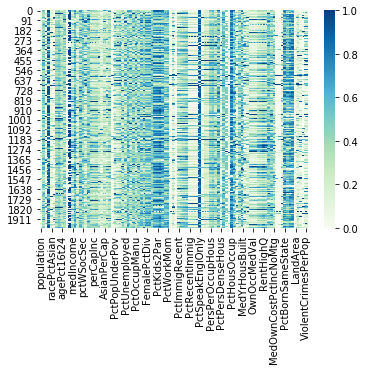

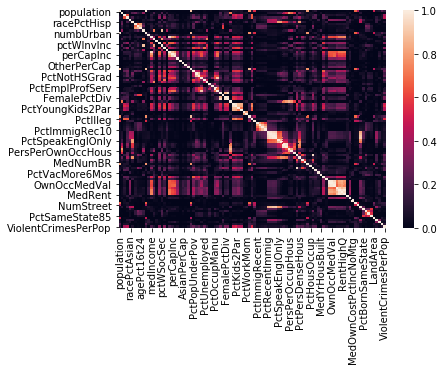

Determination coefficient between 0.7 and 0.8 population NumIlleg 0.783540573041492
Determination coefficient between 0.7 and 0.8 householdsize PersPerFam 0.7143637379894577
Determination coefficient between 0.7 and 0.8 householdsize PersPerOccupHous 0.7970307533036676
Determination coefficient between 0.7 and 0.8 racePctHisp PctSpeakEnglOnly 0.7931997591770562
Determination coefficient between 0.7 and 0.8 racePctHisp PctNotSpeakEnglWell 0.7963881223962999
Determination coefficient between 0.7 and 0.8 racePctHisp PctPersDenseHous 0.772456054528342
Determination coefficient between 0.7 and 0.8 agePct65up pctWWage 0.7032533655905377
Determination coefficient between 0.7 and 0.8 numbUrban NumIlleg 0.7686334690627957
Determination coefficient between 0.7 and 0.8 numbUrban HousVacant 0.7880850218105938
Determination coefficient between 0.7 and 0.8 medIncome perCapInc 0.7997921420566793
Determination coefficient between 0.7 and 0.8 medIncome whitePerCap 0.7051375321911892
Determination coeff

In [4]:
data_clean = data_clean.astype(float)

#Simple heatmap
sns.heatmap(data_clean, cmap = 'GnBu')
plt.show()

#Correlation heatmap 
sns.heatmap(data_clean.astype(float).corr()**2)
plt.show()


df_clean_correlation = data_clean.astype(float).corr()**2
columns_df_clean = df_clean_correlation.columns
determination_coefficient_first = ''
determination_coefficient_second = ''
determination_coefficient_third = ''

#Identification of most import correlation / determination coefficient 
for i in range (0, len(columns_df_clean)):
    for j in range(0, len(df_clean_correlation)):
        if (df_clean_correlation[columns_df_clean[i]][j] > 0.7) & (df_clean_correlation[columns_df_clean[i]][j] <= 0.8):
            determination_coefficient_first+=('Determination coefficient between 0.7 and 0.8 '+str(columns_df_clean[i])+' '+str(columns_df_clean[j])+ ' '+str(df_clean_correlation[columns_df_clean[i]][j])+ '\n')
        
        elif (df_clean_correlation[columns_df_clean[i]][j] > 0.8) & (df_clean_correlation[columns_df_clean[i]][j] <= 0.9):
            determination_coefficient_second+=('Determination coefficient between 0.8 and 0.9 '+str(columns_df_clean[i])+' '+str(columns_df_clean[j])+' '+str(df_clean_correlation[columns_df_clean[i]][j])+'\n')
            
        elif (df_clean_correlation[columns_df_clean[i]][j] > 0.9) & (df_clean_correlation[columns_df_clean[i]][j] <= 0.95):
            determination_coefficient_third+=('Determination coefficient between 0.9 and 0.95 '+str(columns_df_clean[i])+' '+str(columns_df_clean[j])+' '+str(df_clean_correlation[columns_df_clean[i]][j])+'\n')
        
edouard_text = determination_coefficient_first+determination_coefficient_second+determination_coefficient_third
print(edouard_text)

In [36]:
corrT = data_clean.astype(float).corr()**2
corrT = corrT.sort_values(by=['ViolentCrimesPerPop'])
corrT['ViolentCrimesPerPop']

PctSameState85           0.000382
PctVacMore6Mos           0.000486
PctWorkMomYoungKids      0.000487
householdsize            0.001294
racePctAsian             0.001400
PersPerOccupHous         0.001678
PctEmplManu              0.002049
MedOwnCostPctIncNoMtg    0.002950
agePct12t21              0.003629
MedOwnCostPctInc         0.003984
agePct65up               0.004619
PctEmplProfServ          0.005015
PctSameCity85            0.005827
PctBornSameState         0.005915
pctUrban                 0.006675
indianPerCap             0.008268
pctWRetire               0.009587
agePct16t24              0.009836
MedYrHousBuilt           0.012217
pctWSocSec               0.014087
PersPerOwnOccHous        0.015749
OtherPerCap              0.015947
PersPerFam               0.019498
PctWorkMom               0.022533
agePct12t29              0.023400
pctWFarmSelf             0.023405
PctUsePubTrans           0.023757
PctSameHouse85           0.023998
AsianPerCap              0.024179
PctImmigRecent

In [5]:
data_clean_complete = data_clean.copy()
first_quartile = 0.07
median = 0.15
third_quartile = 0.33

data_clean_complete['ViolentCrimesPerPopLevel'] = None

for i in range (0, len(data_clean_complete)):
    if data_clean_complete['ViolentCrimesPerPop'][i] <= first_quartile :
        data_clean_complete['ViolentCrimesPerPopLevel'][i] = 'Low'
    elif (data_clean_complete['ViolentCrimesPerPop'][i] > first_quartile) & (data_clean_complete['ViolentCrimesPerPop'][i] <= median):
        data_clean_complete['ViolentCrimesPerPopLevel'][i] = 'Medium Low'
    elif (data_clean_complete['ViolentCrimesPerPop'][i] > median) & (data_clean_complete['ViolentCrimesPerPop'][i] <= third_quartile):
        data_clean_complete['ViolentCrimesPerPopLevel'][i] = 'Medium High'
    elif (data_clean_complete['ViolentCrimesPerPop'][i] > third_quartile):
        data_clean_complete['ViolentCrimesPerPopLevel'][i] = 'High'

/Users/AymericLepine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/AymericLepine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/AymericLepine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/AymericLepine/anaconda3/lib/python3.6/sit

In [6]:
composants = ['NumIlleg', 'PctHousLess3BR', 'PctNotHSGrad', 'PctVacantBoarded', 'PctHousNoPhone', 'PctUnemployed', 'PctPopUnderPov', 'MalePctDivorce', 'TotalPctDiv', 'FemalePctDiv', 'pctWPubAsst', 'racepctblack', 'PctIlleg', 'ViolentCrimesPerPopLevel']
column = data_clean_complete.columns
print(column)
for i in range(0, len(column)):
    if column[i] not in composants:
        data_clean_complete.drop(columns=[column[i]])

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up',
       ...
       'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85',
       'LandArea', 'PopDens', 'PctUsePubTrans', 'LemasPctOfficDrugUn',
       'ViolentCrimesPerPop', 'ViolentCrimesPerPopLevel'],
      dtype='object', length=102)


In [ ]:
target = data_clean_complete[['ViolentCrimesPerPopLevel']]

from sklearn.manifold import MDS

mds = MDS(n_components=2)
principalComponents = mds.fit_transform(data_clean)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, target], axis = 1)

mean_squared_error(mds.fit_transform(data_train), mds.fit_transform(data_test))

fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('MDS', fontsize = 20)
targets = ['Low', 'Medium Low', 'Medium High', 'High']
colors = ['y', 'b', 'r', 'o']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['ViolentCrimesPerPopLevel'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
    ax.legend(targets)
    ax.grid()
plt.show()

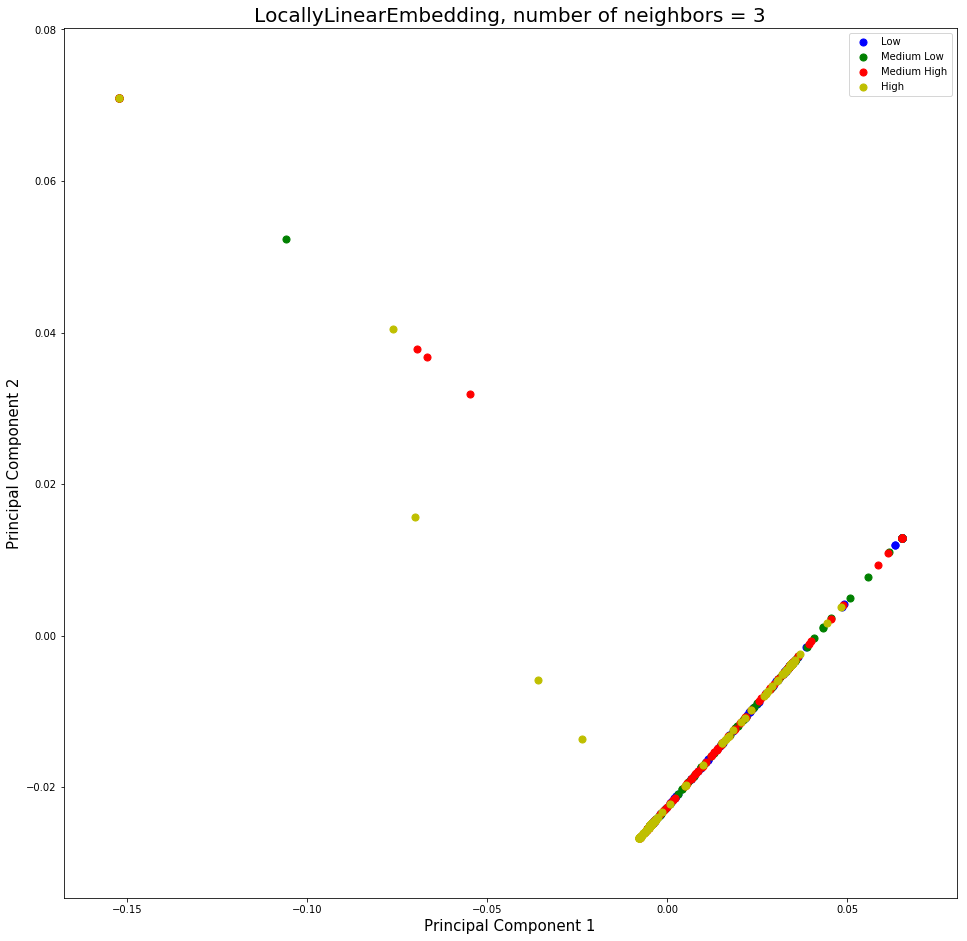

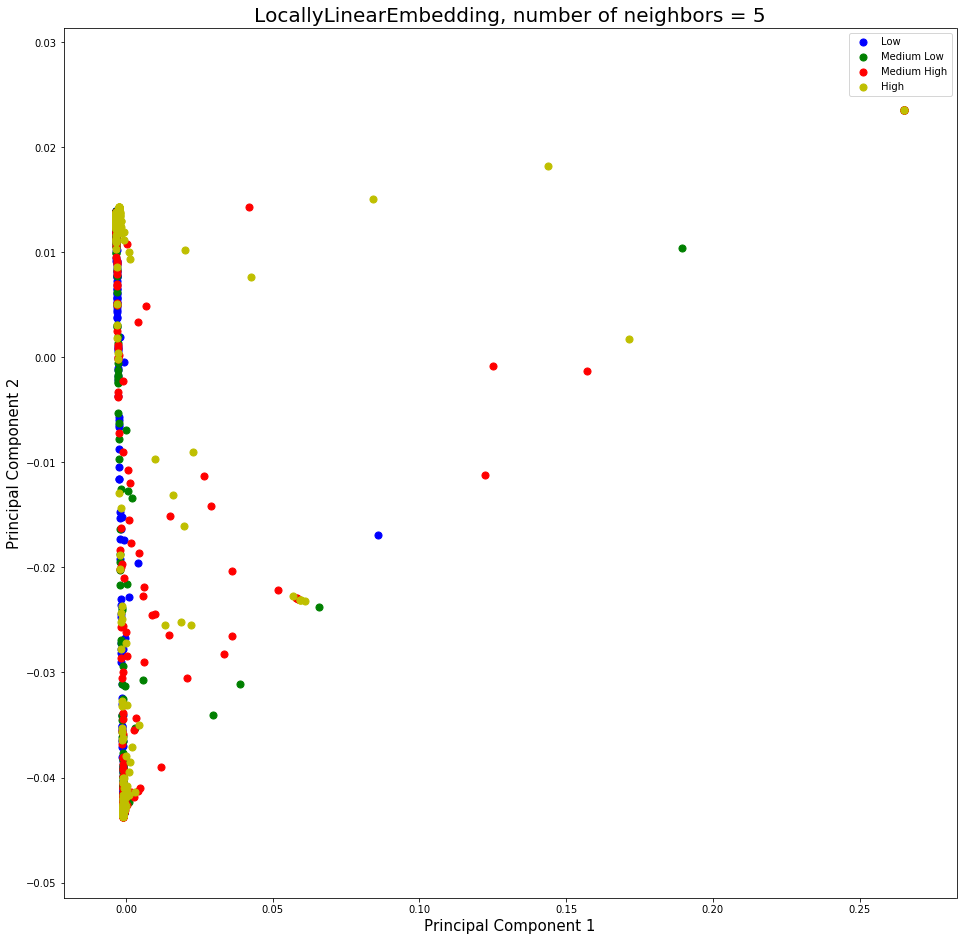

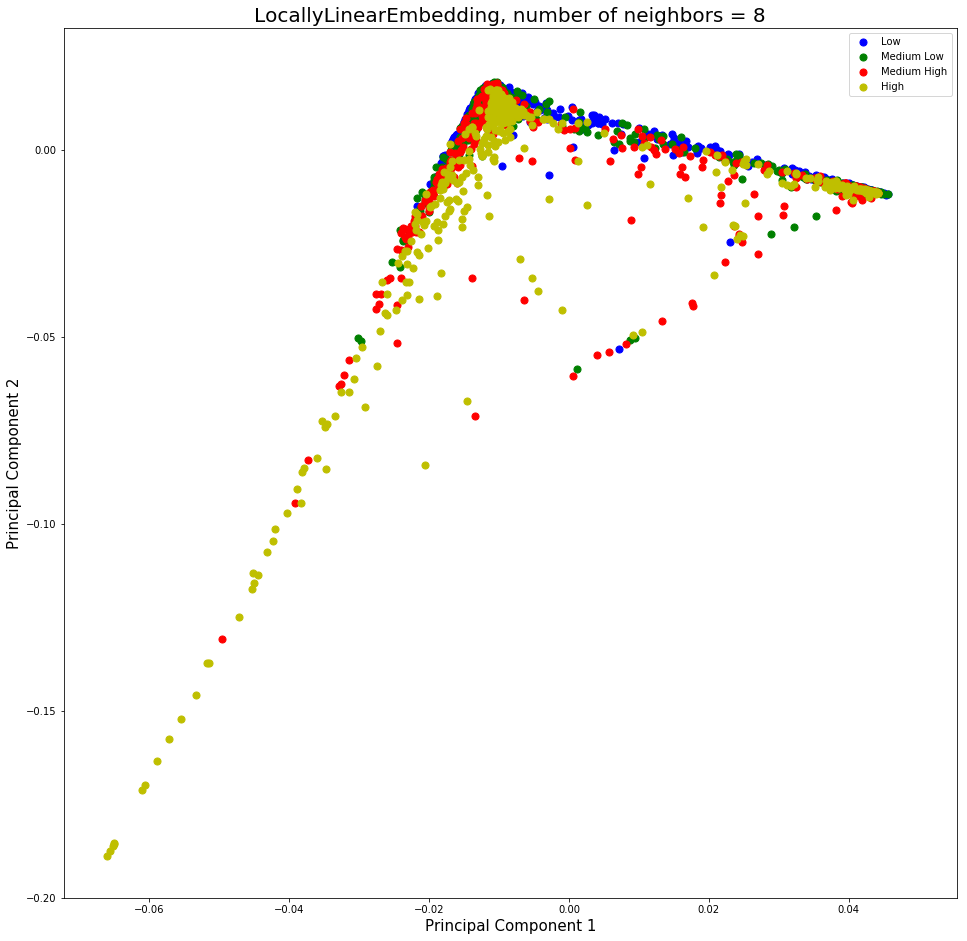

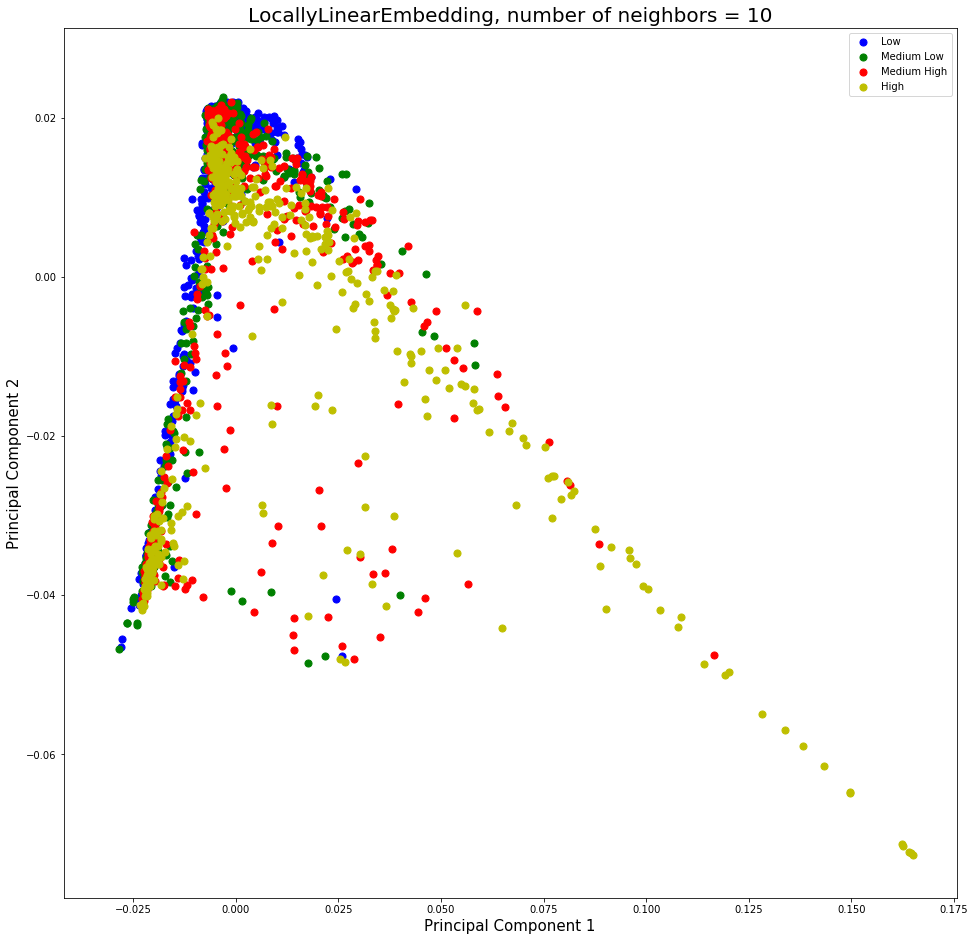

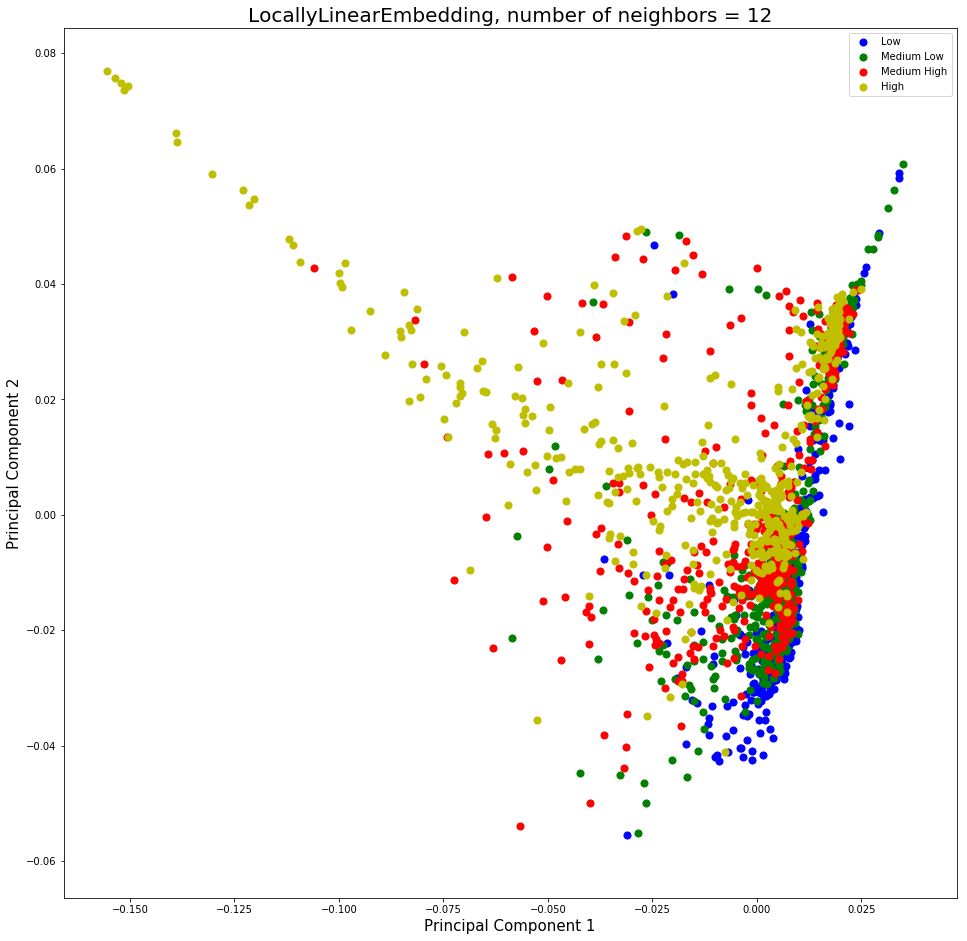

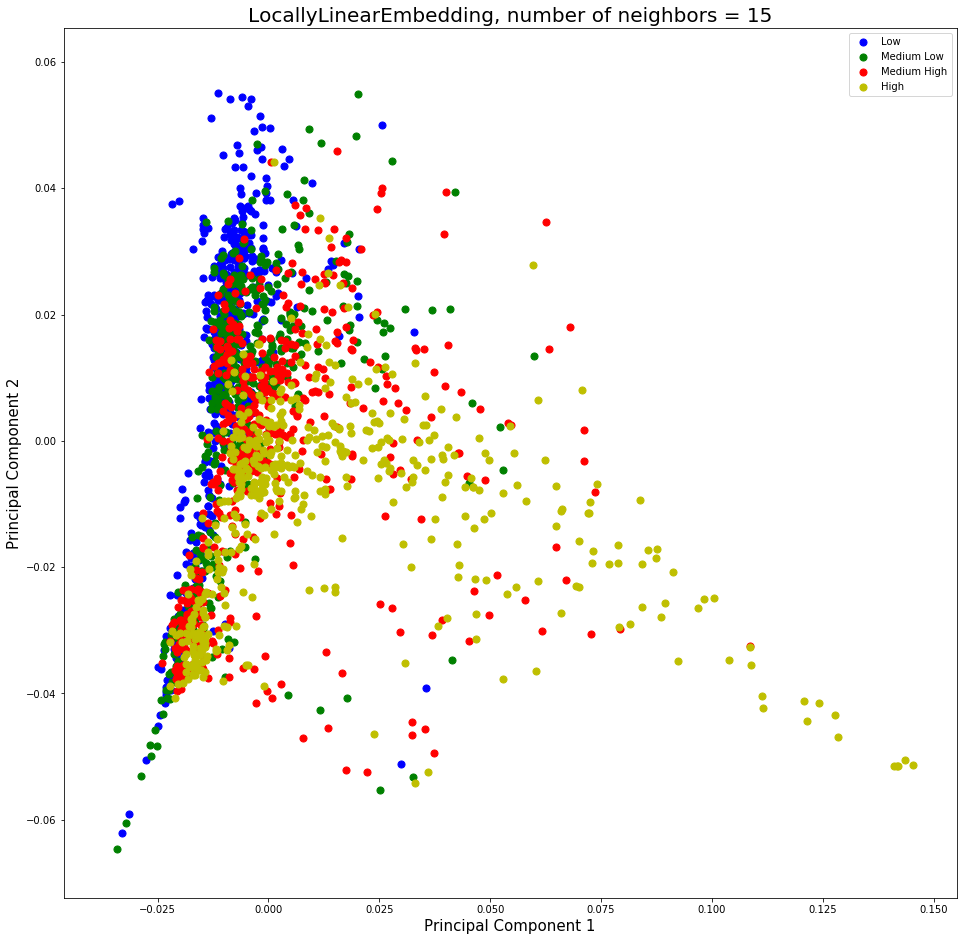

In [17]:
from sklearn.manifold import LocallyLinearEmbedding

numberOfNeighbors = [3, 5, 8, 10, 12, 15]
target2 = pd.DataFrame(data_clean_complete[['ViolentCrimesPerPopLevel']])

for i in range(0, len(numberOfNeighbors)):
    lle = LocallyLinearEmbedding(n_components=14, n_neighbors=numberOfNeighbors[i])
    principalComponents = lle.fit_transform(data_clean)
    principalDf = pd.DataFrame(data=principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10', 'principal component 11', 'principal component 12', 'principal component 13', 'principal component 14'])
    finalDf = pd.concat([principalDf, target2], axis = 1)
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Principal Component 1', fontsize=15)
    ax.set_ylabel('Principal Component 2', fontsize=15)
    title = 'LocallyLinearEmbedding, number of neighbors = '+ str(numberOfNeighbors[i])
    ax.set_title(title, fontsize=20)
    targets = ['Low', 'Medium Low', 'Medium High', 'High']
    colors = ['b', 'g', 'r', 'y']
    for target, color in zip(targets, colors):
        indicesToKeep = finalDf['ViolentCrimesPerPopLevel'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                    , finalDf.loc[indicesToKeep, 'principal component 2']
                    , c=color
                    , s=50)
        ax.legend(targets)
        ax.grid()

    plt.show()

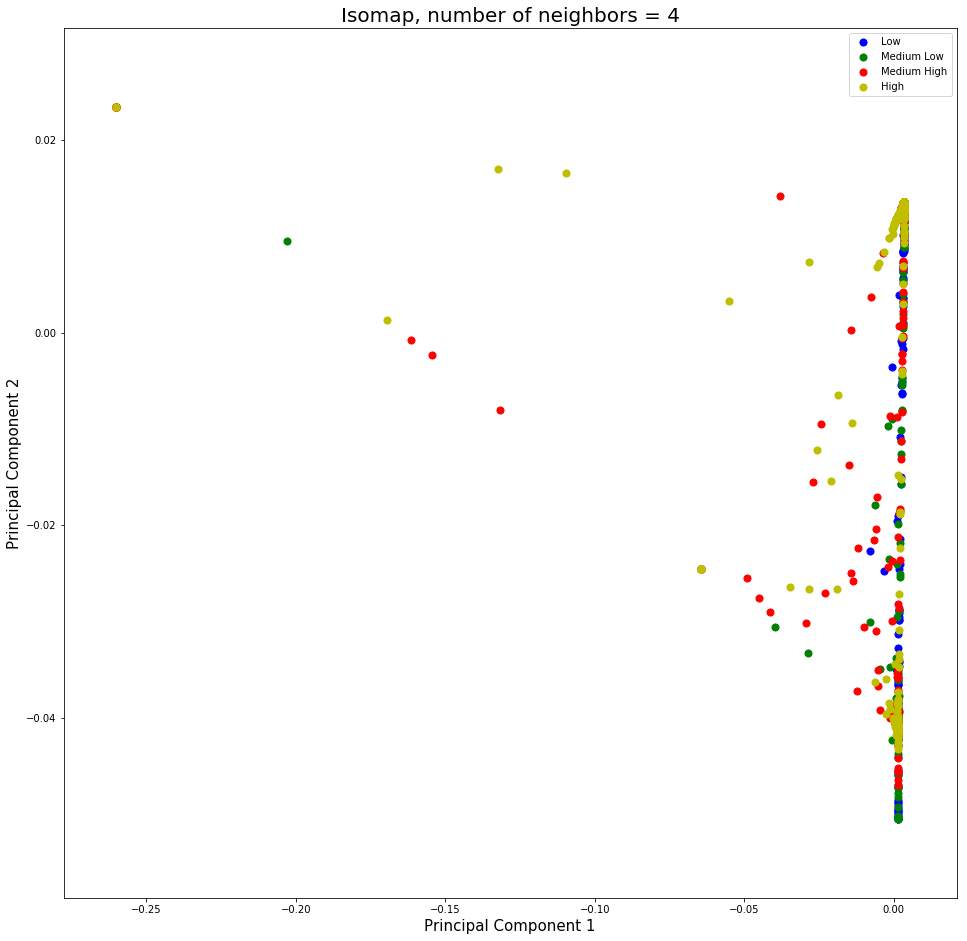

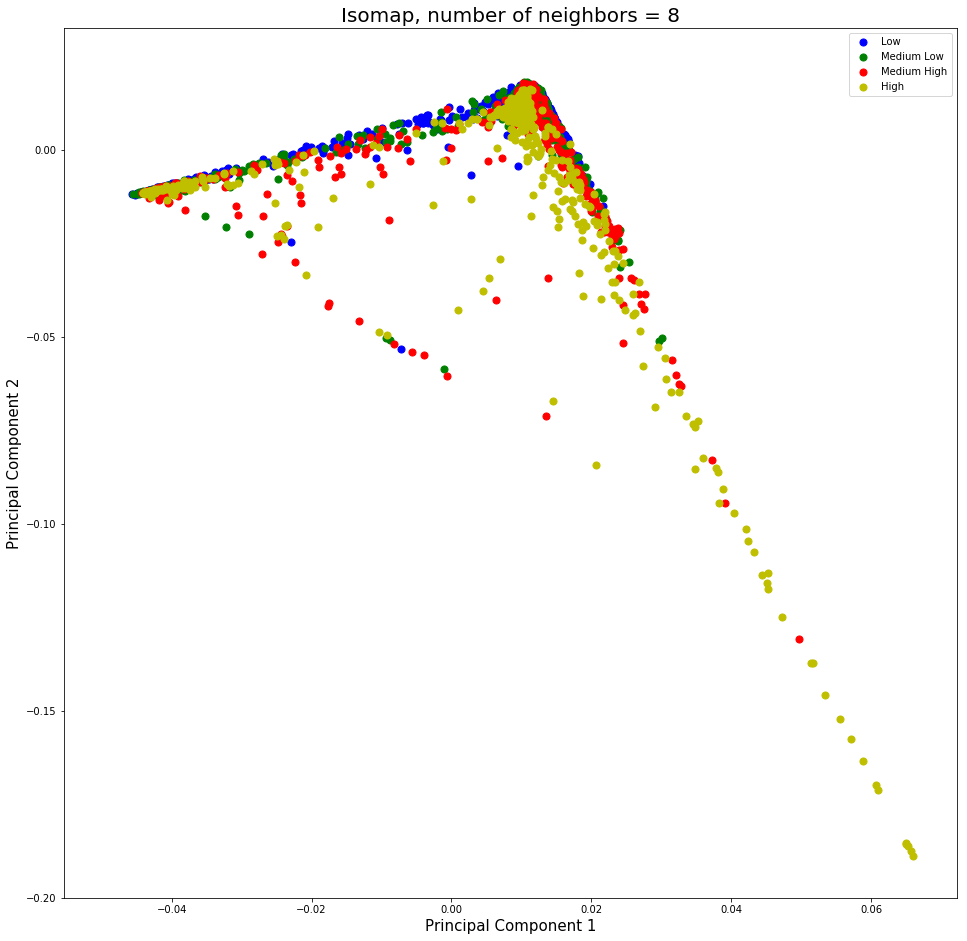

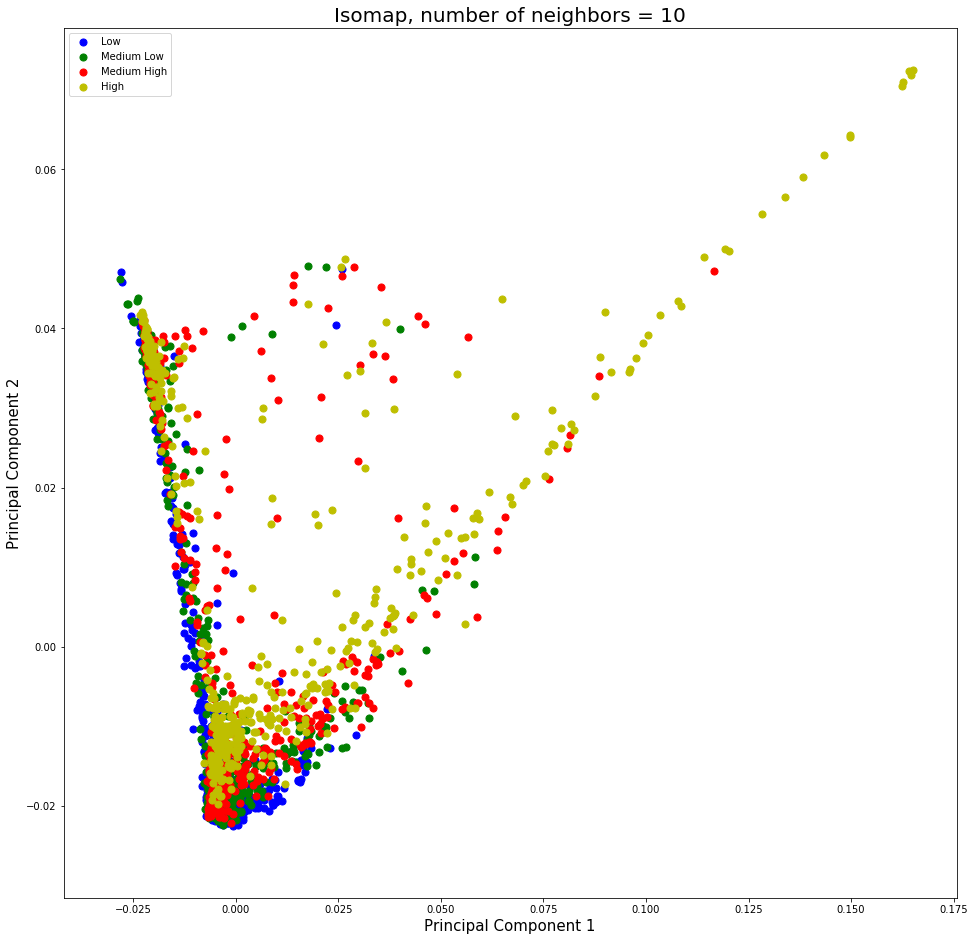

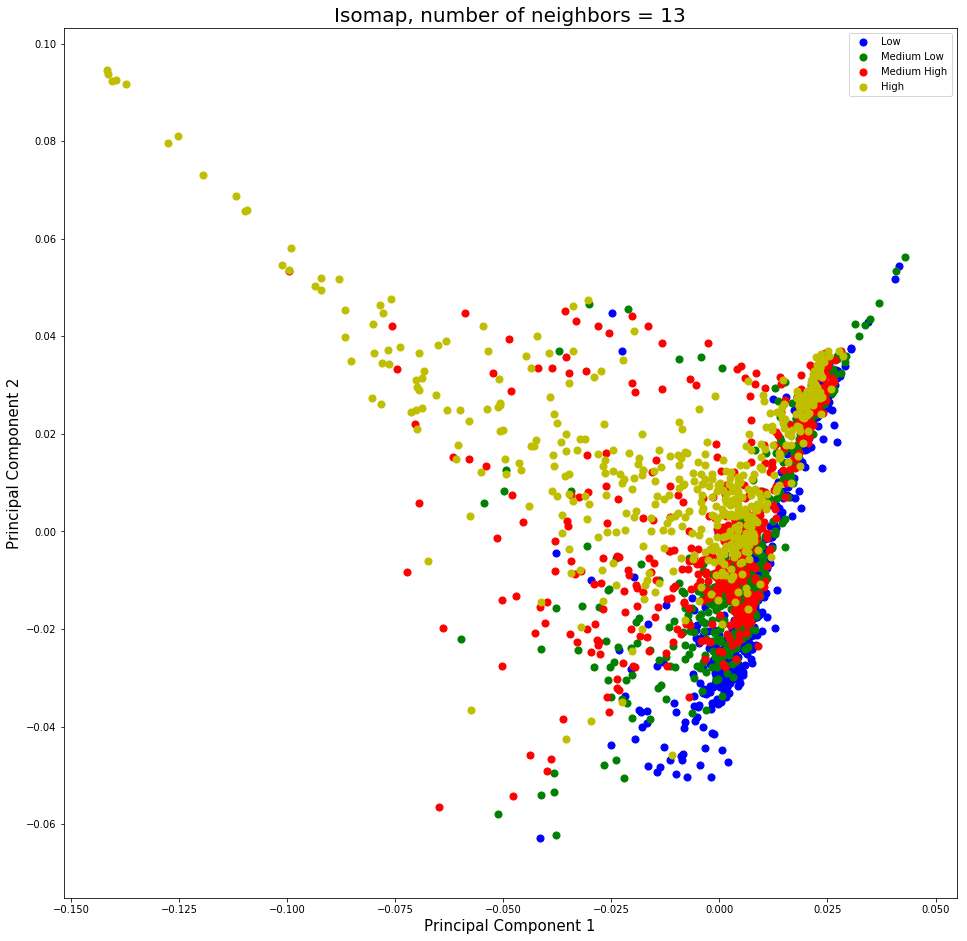

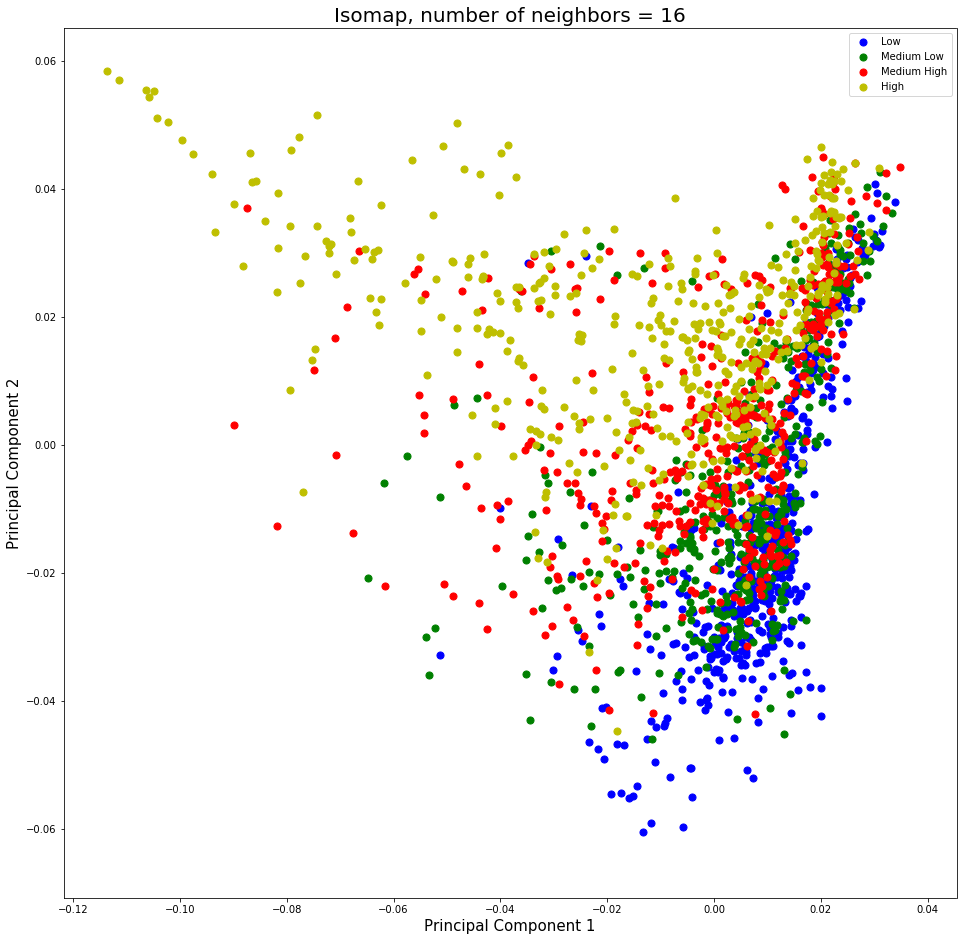

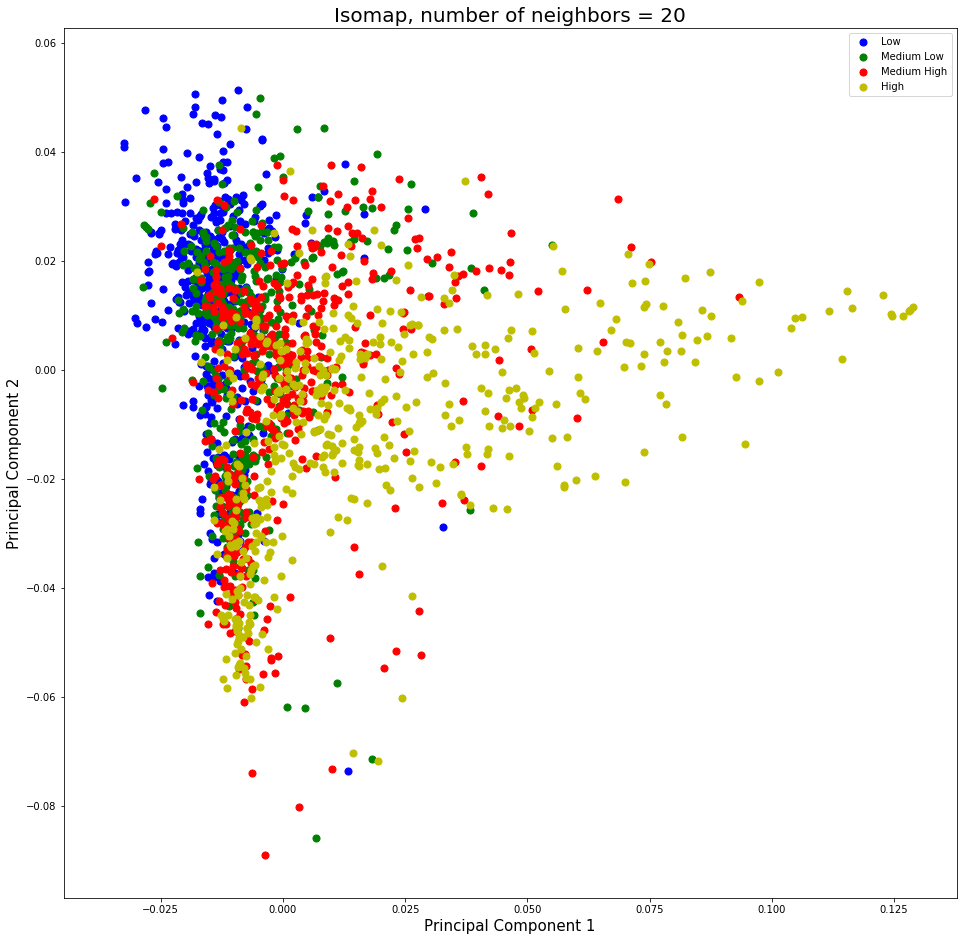

In [19]:
from sklearn.manifold import Isomap

numberOfNeighbors = [4, 8, 10, 13, 16, 20]
target3 = pd.DataFrame(data_clean_complete[['ViolentCrimesPerPopLevel']])


    
for i in range(0, len(numberOfNeighbors)):
    lle = LocallyLinearEmbedding(n_components=2, n_neighbors=numberOfNeighbors[i])
    principalComponents = lle.fit_transform(data_clean)
    principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, target3], axis = 1)
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Principal Component 1', fontsize=15)
    ax.set_ylabel('Principal Component 2', fontsize=15)
    title = 'Isomap, number of neighbors = '+ str(numberOfNeighbors[i])
    ax.set_title(title, fontsize=20)
    targets = ['Low', 'Medium Low', 'Medium High', 'High']
    colors = ['b', 'g', 'r', 'y']
    for target, color in zip(targets, colors):
        indicesToKeep = finalDf['ViolentCrimesPerPopLevel'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                    , finalDf.loc[indicesToKeep, 'principal component 2']
                    , c=color
                    , s=50)
        ax.legend(targets)
        ax.grid()

    plt.show()

In [32]:
from sklearn.cluster import KMeans
#>>> X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
#kmeans = KMeans(n_clusters=14, random_state=0).fit(data_clean)
#kmeans.labels_array([1, 1, 1, 0, 0, 0], dtype=int32)
#kmeans.predict([[0, 0], [12, 3]]), array([1, 0], dtype=int32)
#kmeans.cluster_centers_array([[10.,  2.],[ 1.,  2.]])


kmeans = KMeans(n_clusters=14, n_init=5, max_iter=300, random_state = 0).fit(data_clean)
kmeans.score(data_clean)
prediction=kmeans.predict(data_clean)
print(len(prediction))
for p in prediction: print (p)

centers = kmeans.cluster_centers_

print(centers)

1993
0
0
3
4
7
12
7
11
8
12
9
2
10
4
9
3
13
2
4
7
9
13
3
8
11
0
5
3
3
4
3
8
6
8
10
8
2
11
3
12
7
7
1
9
10
6
4
3
0
3
8
9
7
2
8
3
9
3
0
7
2
3
6
3
11
10
8
10
5
3
10
4
6
2
7
0
8
1
8
0
12
8
3
7
6
3
0
10
3
0
0
4
2
7
0
12
3
6
7
0
8
12
0
8
3
1
6
2
3
13
0
7
2
9
8
10
5
2
0
12
0
2
7
4
3
7
7
9
5
7
1
4
3
9
12
2
2
12
3
10
4
4
1
2
0
5
13
3
1
3
8
8
7
7
1
5
10
1
0
4
6
2
2
2
2
9
6
3
1
8
8
4
3
11
13
2
4
5
3
7
3
3
3
10
7
8
4
4
2
4
5
12
6
4
4
2
4
1
0
1
9
2
8
5
3
0
9
3
2
6
12
7
0
12
4
0
4
4
8
7
3
12
8
7
3
8
1
8
1
8
3
7
3
13
7
3
9
7
7
0
2
3
0
5
3
0
9
0
1
6
13
8
2
12
2
8
3
4
3
11
3
8
13
2
7
3
8
8
6
3
2
8
0
3
4
9
1
7
3
7
6
7
7
0
7
8
12
2
3
7
3
6
4
8
7
2
5
10
11
8
3
3
8
3
0
10
8
3
2
10
7
4
12
8
12
8
1
11
7
3
3
3
3
0
4
11
3
4
8
5
4
4
10
1
3
2
6
4
0
4
2
7
4
7
7
8
13
0
2
6
2
3
3
4
4
3
7
2
3
4
3
8
13
3
0
8
8
11
6
7
8
0
4
4
1
10
2
3
12
0
8
4
2
6
5
3
9
3
9
2
10
4
0
3
10
3
11
7
0
0
8
13
8
11
11
11
7
8
1
10
1
3
3
13
4
0
3
12
2
3
1
12
7
8
7
8
4
1
3
9
7
13
7
1
4
2
8
2
9
8
0
3
3
7
1
3
3
13
10
2
1
3
8
3
8
4
7
5
3
4
1
2
5
4